In [2]:
import pandas as pd

In [3]:
v_ma = pd.read_csv("v_ma.csv")

In [4]:
v_ma.head(10)

,PERMNO,date,TICKER,PRC,ewretd
0,91233,20060525,MA,46.00,0.012579
1,91233,20060526,MA,44.93,0.006560
2,91233,20060530,MA,44.00,-0.012826
3,91233,20060531,MA,44.94,0.008139
4,91233,20060601,MA,47.51,0.012271
5,91233,20060602,MA,46.99,0.004354
6,91233,20060605,MA,49.15,-0.016441
7,91233,20060606,MA,48.30,-0.006274
8,91233,20060607,MA,47.60,-0.003708
9,91233,20060608,MA,47.72,-0.006287


In [5]:
import matplotlib.pyplot as plt

In [6]:
X = v_ma['date']

In [7]:
Y = v_ma['PRC']

In [8]:
plt.plot(X,Y)

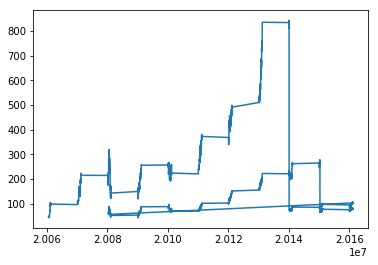

In [10]:
plt.show()

In [11]:
v_ma['TICKER']

0       MA
1       MA
2       MA
3       MA
4       MA
5       MA
6       MA
7       MA
8       MA
9       MA
10      MA
11      MA
12      MA
13      MA
14      MA
15      MA
16      MA
17      MA
18      MA
19      MA
20      MA
21      MA
22      MA
23      MA
24      MA
25      MA
26      MA
27      MA
28      MA
29      MA
        ..
4854     V
4855     V
4856     V
4857     V
4858     V
4859     V
4860     V
4861     V
4862     V
4863     V
4864     V
4865     V
4866     V
4867     V
4868     V
4869     V
4870     V
4871     V
4872     V
4873     V
4874     V
4875     V
4876     V
4877     V
4878     V
4879     V
4880     V
4881     V
4882     V
4883     V
Name: TICKER, Length: 4884, dtype: object

In [13]:
v_ma.groupby(['TICKER']).groups.keys()

dict_keys(['MA', 'V'])

In [208]:
type(v[v_ma.columns[1]])

pandas.core.series.Series

In [16]:
v_ma.columns[2]

'TICKER'

In [25]:
ticker_key = v_ma.groupby([v_ma.columns[2]],as_index=False).groups.keys()

In [29]:
list(ticker_key)[0]

'MA'

In [331]:
ma = v_ma.loc[v_ma[v_ma.columns[2]]==list(ticker_key)[0]]

In [334]:
mX = pd.to_datetime([str(i) for i in m_date], format='%Y%m%d')

In [335]:
mY = ma[ma.columns[3]]

In [336]:
plt.plot(mX,mY)

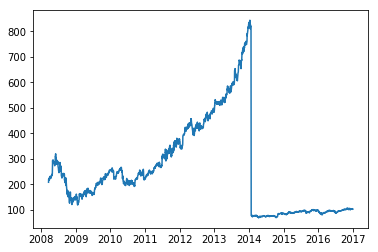

In [337]:
plt.show()

In [332]:
v = v_ma.loc[v_ma[v_ma.columns[2]]==list(ticker_key)[1]]

In [338]:
vX = pd.to_datetime([str(i) for i in v_date], format='%Y%m%d')
#type(vX)

In [339]:
vY = v[v.columns[3]]

In [340]:
plt.plot(vX,vY)

In [333]:
v_date=v[v.columns[1]].reset_index(drop=True)
m_date=ma[ma.columns[1]].reset_index(drop=True)
if v_date[0] > m_date[0]:
    start= m_date[m_date==v_date[0]]
    m_date = m_date[start.index[0]:]
    ma = ma[start.index[0]:]
else:
    start= v_date[v_date==m_date[0]]
    v_date = v_date[start.index[0]:]
    v = v[start.index[0]:]

m_date = m_date.reset_index(drop=True)
v_date = v_date.reset_index(drop=True)

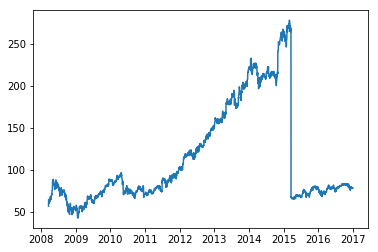

In [341]:
plt.show()

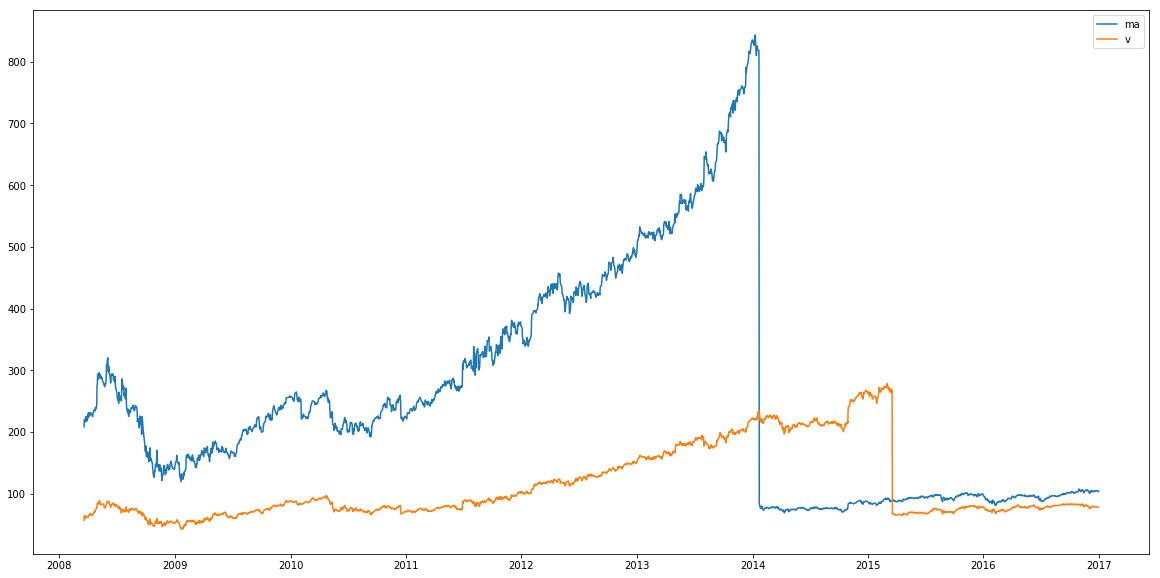

In [342]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(mX,mY,label='ma')
ax.plot(vX,vY,label='v')
plt.legend()
plt.show()

In [350]:
v_t1 = v[v.columns[3]][1:]

In [351]:
v_t0 = v[v.columns[3]][:-1]

In [349]:
v_returns = (v_t1.sub(v_t0.shift())).div(v_t0)
v_returns[4432] = (v[v.columns[3]][4432] - (v[v.columns[3]][4431]/4))/(v[v.columns[3]][4431]/4)

In [352]:
m_t1 = ma[ma.columns[3]][1:]

In [353]:
m_t0 = ma[ma.columns[3]][:-1]

In [354]:
ma_returns = (m_t1.sub(m_t0.shift())).div(m_t0)
ma_returns[1927]=(ma[ma.columns[3]][1927] - (ma[ma.columns[3]][1926]/(10)))/(ma[ma.columns[3]][1926]/(10))
ma_returns.head()

456         NaN
457    0.054406
458   -0.017921
459    0.037692
460   -0.009558
Name: PRC, dtype: float64

In [365]:
d = {
    'v_returns':v_returns.values,
    'ma_returns':ma_returns.values,
    'v_price':
    }
new_df = pd.DataFrame(d, index=v_date)
#new_df.head()

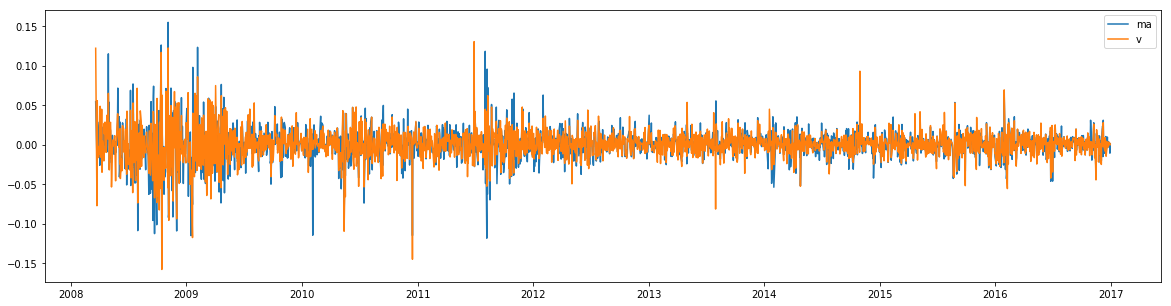

In [356]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(mX,ma_returns,label='ma')
ax.plot(vX,v_returns,label='v')
plt.legend()
plt.show()

In [368]:
new_df.to_csv('~/Desktop/KSEAProject/cleanData.csv')

In [367]:
from johansen import Johansen

In [369]:
df_matrix = new_df.as_matrix()

In [372]:
df_matrix

array([[        nan,         nan],
       [ 0.05440603,  0.12198912],
       [-0.01792148, -0.07734807],
       ..., 
       [-0.01080247, -0.00063857],
       [ 0.0008673 ,  0.000383  ],
       [        nan,         nan]])

In [384]:
d_price = {
    'v_price':vY.values,
    'ma_price':mY.values,
    }
df_price = pd.DataFrame(d_price, index=v_date)
df_price.head()

,ma_price,v_price
date,,
20080319,208.39000,56.50
20080320,220.38000,64.35
20080324,216.50000,59.73
20080325,224.98000,63.25
20080326,222.85001,63.96


In [399]:
price_matrix = df_price.as_matrix()

In [395]:
#price_matrix = price_matrix[1:]
#price_matrix[:,[0,1]]=price_matrix[:,[1,0]]
#price_matrix

array([[  64.35,  220.38],
       [  59.73,  216.5 ],
       [  63.25,  224.98],
       ..., 
       [  78.3 ,  103.68],
       [  78.33,  103.77],
       [  78.02,  103.25]])

In [400]:
johansen = Johansen(price_matrix, model=2, significance_level=0)

In [401]:
vec, r = johansen.johansen()
eigenvector = vec[:,0]

In [402]:
eigenvector

array([ 0.0106197 , -0.00536414])

In [403]:
r

[0, 1]

In [405]:
import numpy as np
vec_min = np.min(np.abs(eigenvector))
eigenvector = eigenvector / vec_min
eigenvector

array([ 1.97975711, -1.        ])

In [415]:
vector, value = johansen.mle()
value
vector[:,value.argmax()]

array([ 0.0106197 , -0.00536414])

In [407]:
vector

array([[ 0.0106197 , -0.01388493],
       [-0.00536414, -0.00220044]])